In [56]:
import numpy as np
from scipy.linalg import expm
from qiskit import *
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit.quantum_info import Operator
from qiskit.circuit.library import UnitaryGate

In [57]:
"""
First Hamiltonian: H = -(Z_1 * Z_2 + Z_2 * Z_3)
"""

'\nFirst Hamiltonian: H = -(Z_1 * Z_2 + Z_2 * Z_3)\n'

In [58]:
t = np.pi

H_1 = QuantumCircuit(3)

H_1.cx(0, 1)
H_1.rz(-2 * t, 1)
H_1.cx(0, 1)

H_1.cx(1, 2)
H_1.rz(-2 * t, 2)
H_1.cx(1, 2)

H_1 = H_1.reverse_bits()
unitary_matrix = Operator(H_1).data

np.set_printoptions(precision=3, suppress=True)
print("Unitary Matrix of the Circuit:\n", unitary_matrix)


Unitary Matrix of the Circuit:
 [[1.-0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.-0.j]]


In [59]:
Z = np.array([[1, 0], [0, -1]])
I = np.eye(2)

H = -1 * ( np.kron(Z, np.kron(I, I)) * np.kron(I, np.kron(Z,I)) + np.kron(I, np.kron(Z, I)) * np.kron(I, np.kron(I,Z)) )

# Compute U = exp(-i H t)
U = expm(-1j * H * t)

np.set_printoptions(precision=3, suppress=True)  # Limits decimal places and suppresses scientific notation
print("Time Evolution Operator U:\n", U)

Time Evolution Operator U:
 [[1.-0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.-0.j]]


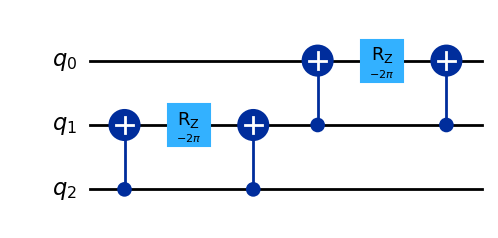

In [60]:
H_1.draw("mpl")

In [61]:
"""
Second Hamiltonian: H = 0.4 * X_1 + 0.5 * X_2
"""

'\nSecond Hamiltonian: H = 0.4 * X_1 + 0.5 * X_2\n'

In [62]:
t = np.pi

H_2 = QuantumCircuit(3)

H_2.h(0)
H_2.rz(2 * 0.4 * t, 0)
H_2.h(0)

H_2.h(1)
H_2.rz(2 * 0.5 * t, 1)
H_2.h(1)

H_2 = H_2.reverse_bits()
unitary_matrix = Operator(H_2).data

np.set_printoptions(precision=3, suppress=True)
print("Unitary Matrix of the Circuit:\n", unitary_matrix)


Unitary Matrix of the Circuit:
 [[ 0.   +0.j     0.   +0.j     0.   -0.309j  0.   +0.j     0.   -0.j
   0.   +0.j    -0.951+0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j     0.   -0.309j  0.   +0.j
   0.   -0.j     0.   +0.j    -0.951+0.j   ]
 [ 0.   -0.309j  0.   +0.j     0.   +0.j     0.   +0.j    -0.951+0.j
   0.   +0.j     0.   -0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   -0.309j  0.   +0.j     0.   +0.j     0.   +0.j
  -0.951+0.j     0.   +0.j     0.   -0.j   ]
 [ 0.   -0.j     0.   +0.j    -0.951+0.j     0.   +0.j     0.   +0.j
   0.   +0.j     0.   -0.309j  0.   +0.j   ]
 [ 0.   +0.j     0.   -0.j     0.   +0.j    -0.951+0.j     0.   +0.j
   0.   +0.j     0.   +0.j     0.   -0.309j]
 [-0.951+0.j     0.   +0.j     0.   -0.j     0.   +0.j     0.   -0.309j
   0.   +0.j     0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j    -0.951+0.j     0.   +0.j     0.   -0.j     0.   +0.j
   0.   -0.309j  0.   +0.j     0.   +0.j   ]]


In [63]:
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)

H = ( 0.4 * np.kron(X, np.kron(I, I)) + 0.5 * np.kron(I, np.kron(X, I)) )

# Compute U = exp(-i H t)
U = expm(-1j * H * t)

np.set_printoptions(precision=3, suppress=True)  # Limits decimal places and suppresses scientific notation
print("Time Evolution Operator U:\n", U)


Time Evolution Operator U:
 [[ 0.   +0.j     0.   +0.j     0.   -0.309j  0.   +0.j     0.   -0.j
   0.   +0.j    -0.951+0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j     0.   -0.309j  0.   +0.j
   0.   -0.j     0.   +0.j    -0.951+0.j   ]
 [ 0.   -0.309j  0.   +0.j     0.   +0.j     0.   +0.j    -0.951+0.j
   0.   +0.j     0.   -0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   -0.309j  0.   +0.j     0.   +0.j     0.   +0.j
  -0.951+0.j     0.   +0.j     0.   -0.j   ]
 [ 0.   -0.j     0.   +0.j    -0.951+0.j     0.   +0.j     0.   +0.j
   0.   +0.j     0.   -0.309j  0.   +0.j   ]
 [ 0.   +0.j     0.   -0.j     0.   +0.j    -0.951+0.j     0.   +0.j
   0.   +0.j     0.   +0.j     0.   -0.309j]
 [-0.951+0.j     0.   +0.j     0.   -0.j     0.   +0.j     0.   -0.309j
   0.   +0.j     0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j    -0.951+0.j     0.   +0.j     0.   -0.j     0.   +0.j
   0.   -0.309j  0.   +0.j     0.   +0.j   ]]


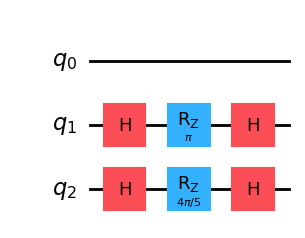

In [64]:
H_2.draw("mpl")

In [65]:
"""
Third Hamiltonian: H = -(Z_1 * Z_2 + Z_2 * Z_3) + 0.4 * X_1 + 0.5 * X_2
"""

'\nThird Hamiltonian: H = -(Z_1 * Z_2 + Z_2 * Z_3) + 0.4 * X_1 + 0.5 * X_2\n'

In [66]:
t = np.pi
r = 100

H_3 = QuantumCircuit(3)

for _ in range(r):
    H_3.cx(0, 1)
    H_3.rz(-2 * t / r, 1)
    H_3.cx(0, 1)

    H_3.cx(1, 2)
    H_3.rz(-2 * t / r, 2)
    H_3.cx(1, 2)

    H_3.h(0)
    H_3.rz(2 * 0.4 * t / r, 0)
    H_3.h(0)

    H_3.h(1)
    H_3.rz(2 * 0.5 * t / r, 1)
    H_3.h(1)

H_3 = H_3.reverse_bits()
unitary_matrix = Operator(H_3).data
circuit_matrix_trace = np.trace(unitary_matrix)

np.set_printoptions(precision=3, suppress=True)
print("Unitary Matrix of the Circuit:\n", unitary_matrix)


Unitary Matrix of the Circuit:
 [[ 0.863+0.437j  0.   +0.j    -0.005-0.074j  0.   +0.j    -0.147-0.023j
   0.   +0.j     0.067-0.178j  0.   +0.j   ]
 [ 0.   +0.j     0.135+0.14j   0.   +0.j    -0.   -0.951j  0.   +0.j
   0.145-0.032j  0.   +0.j     0.078-0.173j]
 [ 0.005-0.074j  0.   +0.j     0.863-0.437j  0.   +0.j     0.067+0.178j
   0.   +0.j     0.147-0.023j  0.   +0.j   ]
 [ 0.   +0.j     0.   -0.951j  0.   +0.j     0.135-0.14j   0.   +0.j
   0.078+0.173j  0.   +0.j    -0.145-0.032j]
 [-0.145-0.032j  0.   +0.j     0.078+0.173j  0.   +0.j     0.135-0.14j
   0.   +0.j     0.   -0.951j  0.   +0.j   ]
 [ 0.   +0.j     0.147-0.023j  0.   +0.j     0.067+0.178j  0.   +0.j
   0.863-0.437j  0.   +0.j     0.005-0.074j]
 [ 0.078-0.173j  0.   +0.j     0.145-0.032j  0.   +0.j    -0.   -0.951j
   0.   +0.j     0.135+0.14j   0.   +0.j   ]
 [ 0.   +0.j     0.067-0.178j  0.   +0.j    -0.147-0.023j  0.   +0.j
  -0.005-0.074j  0.   +0.j     0.863+0.437j]]


In [67]:
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
I = np.eye(2)

H = -1 * ( np.kron(Z, np.kron(I, I)) * np.kron(I, np.kron(Z,I)) + np.kron(I, np.kron(Z, I)) * np.kron(I, np.kron(I,Z)) ) + ( 0.4 * np.kron(X, np.kron(I, I)) + 0.5 * np.kron(I, np.kron(X, I)) )

# Compute U = exp(-i H t)
U = expm(-1j * H * t)
true_matrix_trace = np.trace(U)

np.set_printoptions(precision=3, suppress=True)  # Limits decimal places and suppresses scientific notation
print("Time Evolution Operator U:\n", U)


Time Evolution Operator U:
 [[ 0.863+0.437j  0.   +0.j     0.   -0.074j  0.   +0.j    -0.146-0.028j
   0.   +0.j     0.073-0.175j  0.   +0.j   ]
 [ 0.   +0.j     0.135+0.14j   0.   +0.j    -0.   -0.951j  0.   +0.j
   0.146-0.028j  0.   +0.j     0.073-0.175j]
 [-0.   -0.074j  0.   +0.j     0.863-0.437j  0.   +0.j     0.073+0.175j
   0.   +0.j     0.146-0.028j  0.   +0.j   ]
 [ 0.   +0.j     0.   -0.951j  0.   +0.j     0.135-0.14j   0.   +0.j
   0.073+0.175j  0.   +0.j    -0.146-0.028j]
 [-0.146-0.028j  0.   +0.j     0.073+0.175j  0.   +0.j     0.135-0.14j
   0.   +0.j     0.   -0.951j  0.   +0.j   ]
 [ 0.   +0.j     0.146-0.028j  0.   +0.j     0.073+0.175j  0.   +0.j
   0.863-0.437j  0.   +0.j     0.   -0.074j]
 [ 0.073-0.175j  0.   +0.j     0.146-0.028j  0.   +0.j     0.   -0.951j
   0.   +0.j     0.135+0.14j   0.   +0.j   ]
 [ 0.   +0.j     0.073-0.175j  0.   +0.j    -0.146-0.028j  0.   +0.j
  -0.   -0.074j  0.   +0.j     0.863+0.437j]]


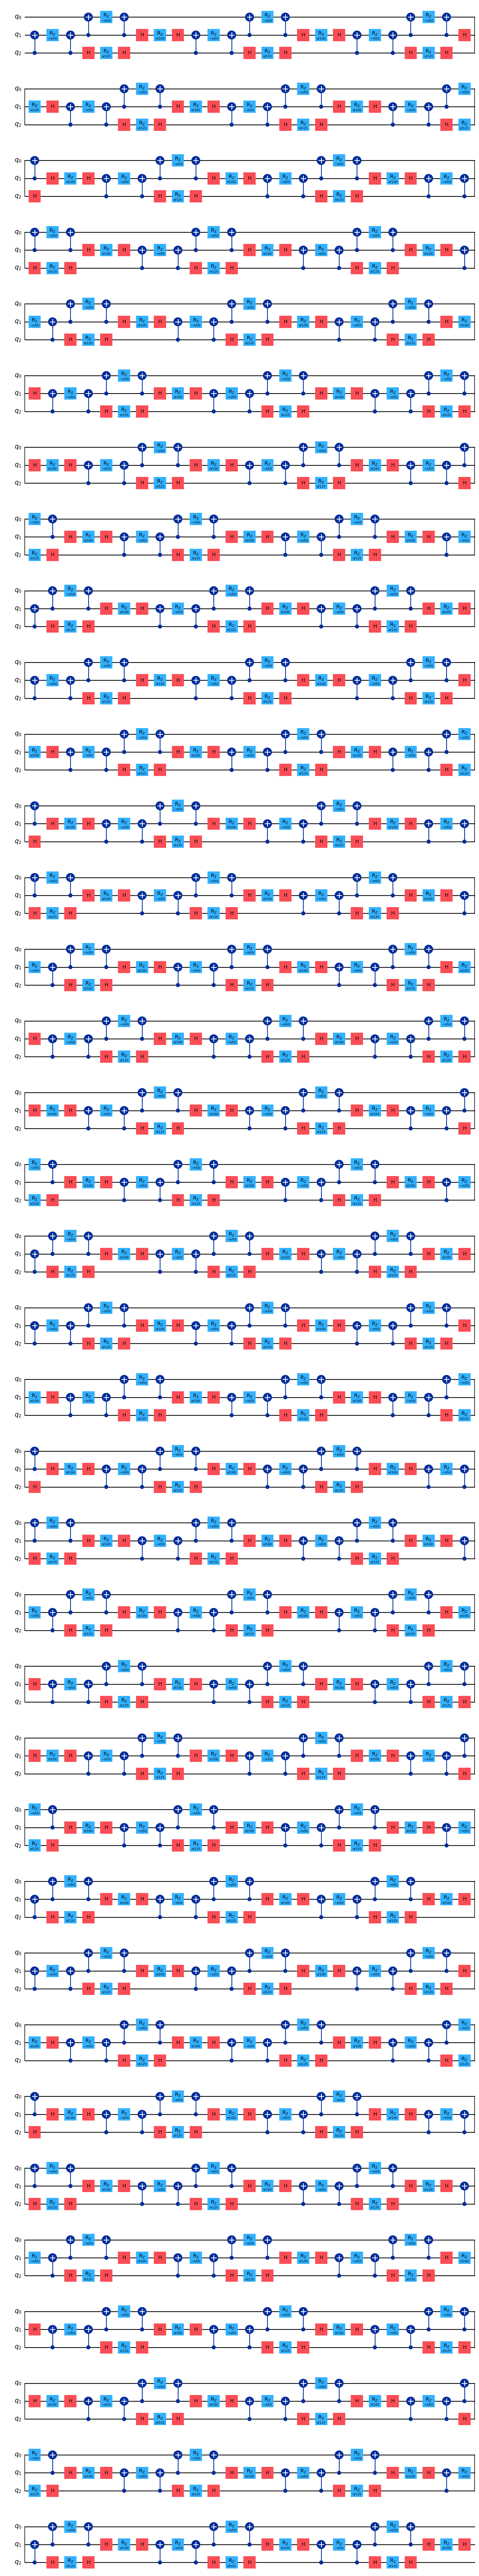

In [46]:
H_3.draw("mpl")

In [69]:
""" Error Calculation """
print("\nTrace of the Circuit Matrix:", circuit_matrix_trace)
print("\nTrace of the True Matrix:", true_matrix_trace)
Error = true_matrix_trace - circuit_matrix_trace
Error_Constant = (Error * r) / t**2
print("\nError:", Error)
print("\nThe error is on the order of t^2 /r times:", Error_Constant)



Trace of the Circuit Matrix: (3.9929381108402704+0j)

Trace of the True Matrix: (3.992585216889232-2.220446049250313e-16j)

Error: (-0.00035289395103843546-2.220446049250313e-16j)

The error is on the order of t^2 /r times: (-0.0035755632819435474-2.2497822192399436e-15j)
